In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text
from py_pcha import PCHA
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('data_raw/DO_data.csv')
strains = np.delete(df['Strain'].unique(),df['Strain'].unique()=='DO')
colors_dict = {'A/J':'#fbd921', 'C57BL/6J':'#a1a29e','C57BL/6':'#a1a29e', '129S1/SvImJ':'#efaeb6',
               'NOD/ShiLtJ':'#305c9b','NZO/HILtJ':'#89d0e8','PWK/PhJ':'#dd433d',
                'CAST/EiJ':'#4eaf47','WSB/EiJ':'#884187','DO':'#cfcec8'}
df_strains_av = []
for strain in strains:
    df_strain = df[df['Strain']==strain]
    df_strain_av = pd.DataFrame(columns = ['Day','Strain','Weight','Weight.Percent.Loss',
                                           'Temperature','Temperature.Delta',
                                           'RBC','Parasitemia','Parasite.Density'])
    for day,strain_day_data in df_strain.groupby('Day'):
        row = {'Day':[day],'Strain':[strain]}
        for col in df_strain_av.columns[2:]:
            row[col] = [strain_day_data[col].mean()]
        df_strain_av = pd.concat([df_strain_av,pd.DataFrame(row)],ignore_index=True)
    df_strain_av = df_strain_av.dropna()
    df_strains_av.append(df_strain_av)

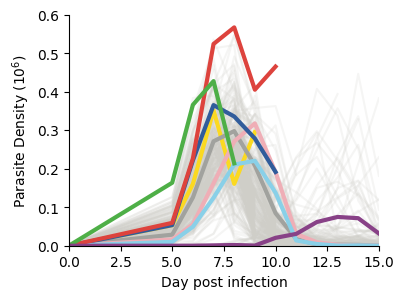

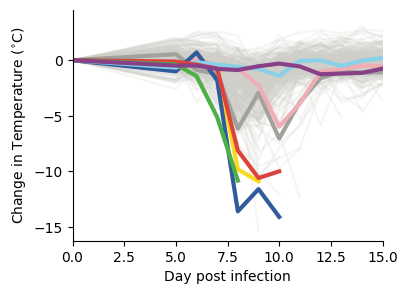

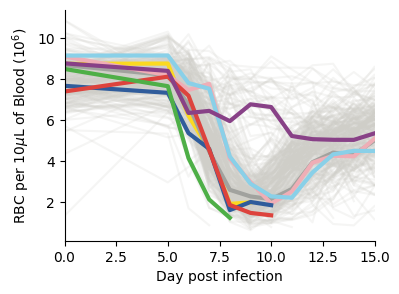

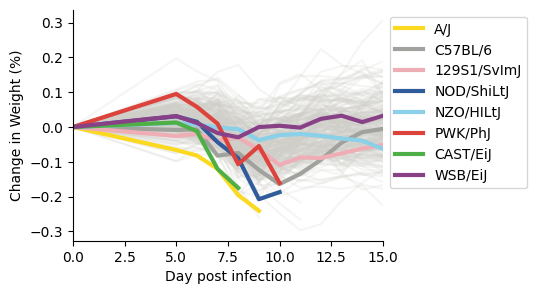

In [3]:
groups = df.groupby('Mouse.ID')
fig_parasitemia,axs_parasitemia = plt.subplots(figsize = (4,3))
fig_temp_delta,axs_temp_delta = plt.subplots(figsize = (4,3))
fig_rbc,axs_rbc = plt.subplots(figsize = (4,3))
fig_weight_delta,axs_weight_delta = plt.subplots(figsize = (4,3))

for group_name,group_df in groups:
    if group_df.iloc[0]['Strain']=='DO':
        if group_name==0:
            axs_parasitemia.plot(group_df['Day'],group_df['Parasitemia'],color = colors_dict['DO'],alpha = 0.2,label = 'DO')
            axs_temp_delta.plot(group_df['Day'],group_df['Temperature.Delta'],color = colors_dict['DO'],alpha = 0.2,label = 'DO')
            axs_rbc.plot(group_df['Day'],group_df['RBC'],color = colors_dict['DO'],alpha = 0.2,label = 'DO')
            axs_weight_delta.plot(group_df['Day'],group_df['Weight.Percent.Loss'],color = colors_dict['DO'],alpha = 0.2,label = 'DO')

        else:
            axs_parasitemia.plot(group_df['Day'],group_df['Parasitemia'],color = colors_dict['DO'],alpha = 0.2)
            axs_temp_delta.plot(group_df['Day'],group_df['Temperature.Delta'],color = colors_dict['DO'],alpha = 0.2)
            axs_rbc.plot(group_df['Day'],group_df['RBC'],color = colors_dict['DO'],alpha = 0.2)
            axs_weight_delta.plot(group_df['Day'],group_df['Weight.Percent.Loss'],color = colors_dict['DO'],alpha = 0.2)
for df_strain_av,strain in zip(df_strains_av,strains):
    axs_parasitemia.plot(df_strain_av['Day'],df_strain_av['Parasitemia'],color = colors_dict[strain],
             lw = 3,label = strain)
    axs_temp_delta.plot(df_strain_av['Day'],df_strain_av['Temperature.Delta'],color = colors_dict[strain],
             lw = 3,label = strain)
    axs_rbc.plot(df_strain_av['Day'],df_strain_av['RBC'],color = colors_dict[strain],
             lw = 3,label = strain)
    axs_weight_delta.plot(df_strain_av['Day'],df_strain_av['Weight.Percent.Loss'],color = colors_dict[strain],
             lw = 3,label = strain)
for i,axs in enumerate([axs_parasitemia,axs_temp_delta,axs_rbc,axs_weight_delta]):
    axs.set_xlabel('Day post infection')
    axs.set_xlim(0,15)
    axs.spines[['right', 'top']].set_visible(False)
    
axs_weight_delta.legend(loc='upper left', bbox_to_anchor=(1, 1))

axs_parasitemia.set_ylim(0,0.6)
axs_parasitemia.set_ylabel('Parasite Density $(10^6)$')
axs_weight_delta.set_ylabel('Change in Weight (%)')
axs_temp_delta.set_ylabel('Change in Temperature ($^{\circ}$C)')
axs_rbc.set_ylabel('RBC per 10$\mu$L of Blood ($10^6$)')

fig_parasitemia.savefig('1D.png',dpi = 600,bbox_inches = 'tight')
fig_weight_delta.savefig('1A.png',dpi = 600,bbox_inches = 'tight')
fig_temp_delta.savefig('1B.png',dpi = 600,bbox_inches = 'tight')
fig_rbc.savefig('1C.png',dpi = 600,bbox_inches = 'tight')



/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_58058/994070972.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.xaxis.set_ticklabels([''])
/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_58058/994070972.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.yaxis.set_ticklabels([''])
/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_58058/994070972.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.zaxis.set_ticklabels([''])


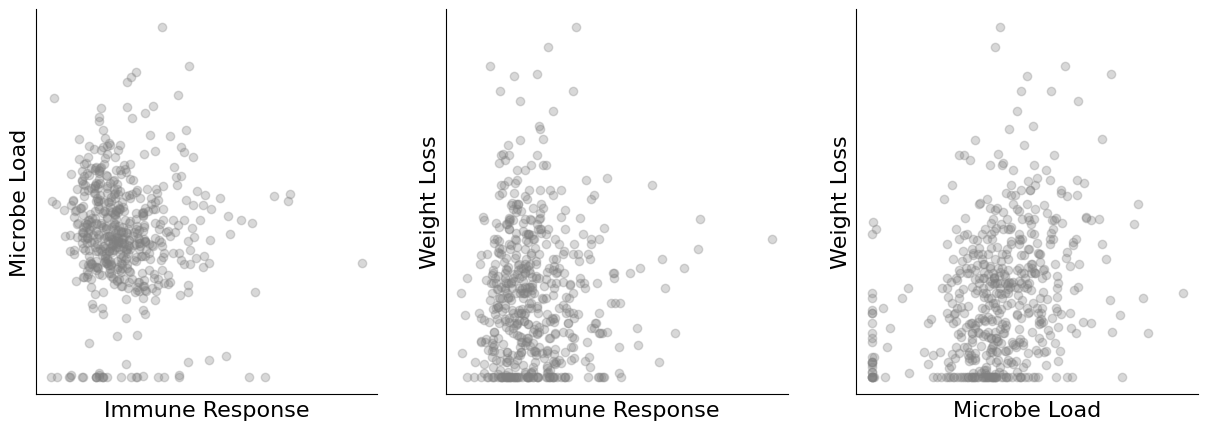

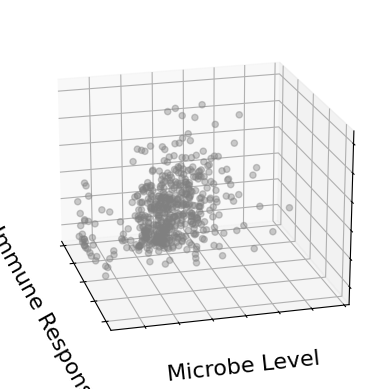

In [ ]:
df_maxs = pd.read_csv('data/df_maxs.csv')
import mpl_toolkits.axisartist as AA
colors_hex_m = ['#1e76b3','#ff7e0d','#2c9f2c','#d52627']
markers_plotly = ['circle','diamond','square','x']

fig,axs = plt.subplots(figsize = (15,5),ncols = 3)
D = 'Weight'
damage_col_name = f'Max.{D}.Delta.zscore'

axs[0].set_xlabel('Immune Response',fontsize = 16)
axs[0].set_ylabel('Microbe Load',fontsize = 16)
axs[0].scatter(df_maxs['Immune.Intensity.zscore'], df_maxs['Max.Parasitemia.zscore'],c='grey',alpha = 0.3,zorder = -1)
axs[1].set_xlabel('Immune Response',fontsize = 16)
axs[1].set_ylabel(f'Weight Loss',fontsize = 16)
axs[1].scatter(df_maxs['Immune.Intensity.zscore'], df_maxs[f'Max.{D}.Delta.zscore'],c='grey',alpha = 0.3,zorder = -1)
axs[2].set_xlabel('Microbe Load',fontsize = 16)
axs[2].set_ylabel(f'Weight Loss',fontsize = 16)
axs[2].scatter(df_maxs['Max.Parasitemia.zscore'], df_maxs[f'Max.{D}.Delta.zscore'],c='grey',alpha = 0.3,zorder = -1,label = 'DO points')
for ax in axs:
    ax.spines[['top','right']].set_visible(False)
    ax.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False)
fig.savefig(f'1E_{D}_just_data.png',dpi = 600)
fig.savefig(f'1E_{D}_just_data.pdf',dpi = 600)

fig4 = plt.figure()

ax4 = fig4.add_subplot(projection='3d')
ax4.scatter(df_maxs['Immune.Intensity.zscore'],df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],color = 'grey',alpha = 0.4,zorder = -1)
ax4.set_xlabel('Immune Response',fontsize = 16)
ax4.set_ylabel('Microbe Level',fontsize = 16)
ax4.set_zlabel('Weight Loss',fontsize = 16)
ax4.xaxis.set_ticklabels([''])
ax4.yaxis.set_ticklabels([''])
ax4.zaxis.set_ticklabels([''])
ax4.view_init(elev=20., azim=-15, roll=0)

fig4.savefig(f'1E1_{D}_just_data.png',dpi = 600)
fig4.savefig(f'1E1_{D}_just_data.pdf',dpi = 600)


/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



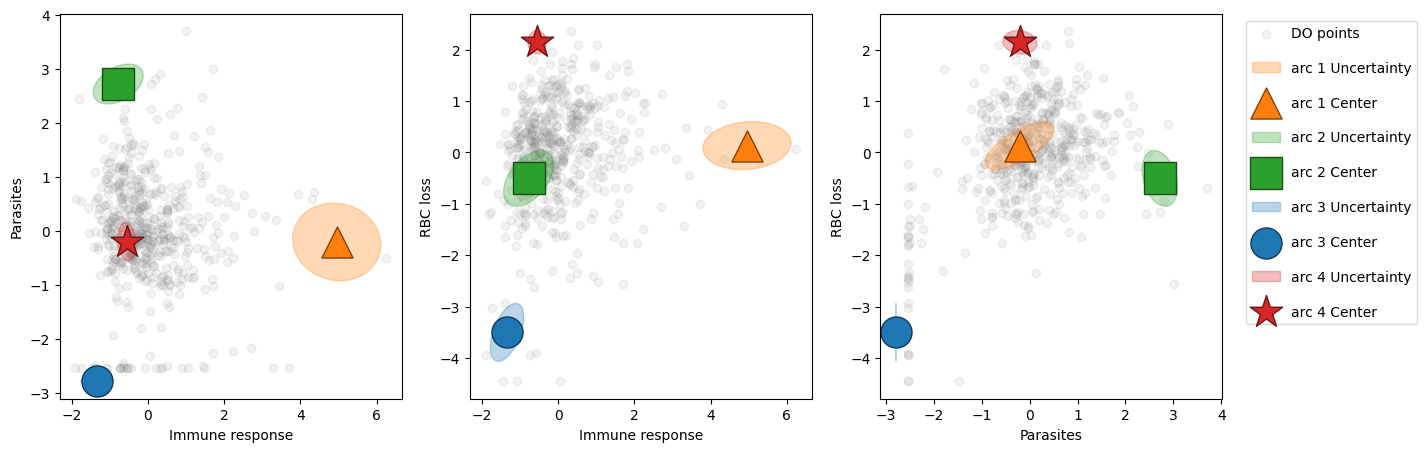

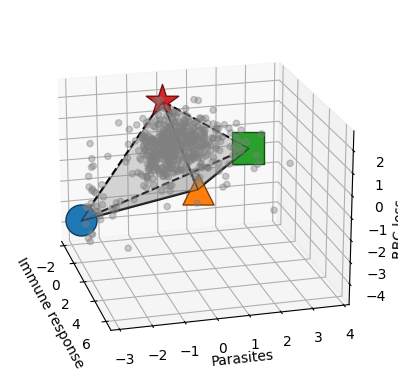

/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



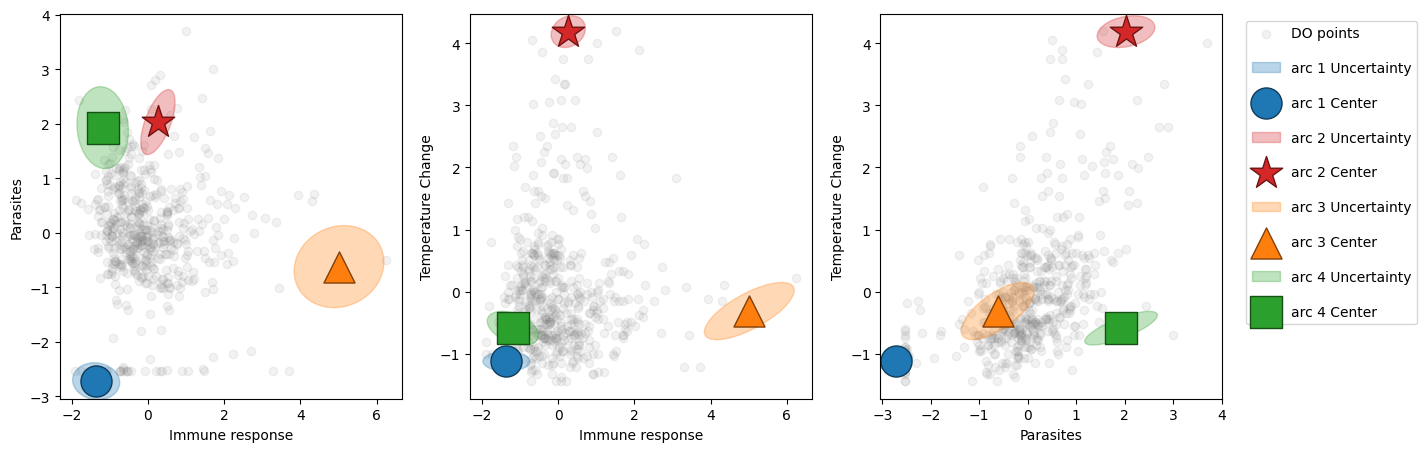

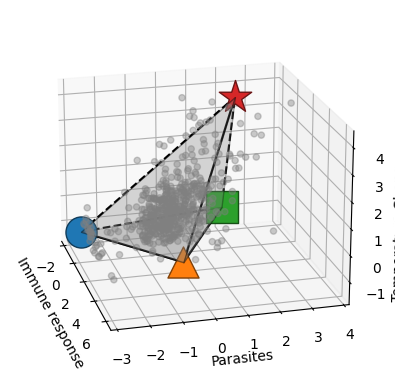

/Users/yaelleb/.pyenv/versions/3.11.3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



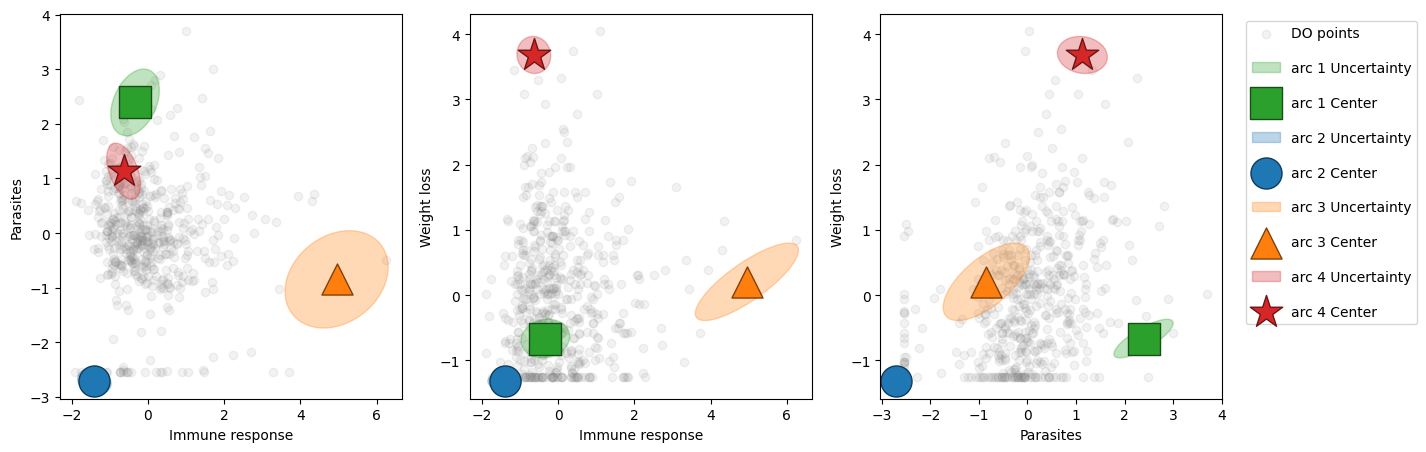

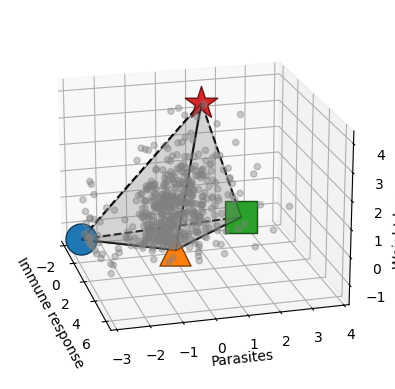

In [11]:
df_maxs = pd.read_csv('data/df_maxs.csv')
Ds = ['RBC','Temp','Weight']
D_labels = ['RBC loss','Temperature Change', 'Weight loss']
np.random.seed(7)
from matplotlib.patches import Ellipse
%matplotlib inline
# Generate or load your 3D dataset
# Example: Replace this with your data
bootstrap_num_iterations = 50
num_sample = 200
for D,D_label in zip(Ds,D_labels):
    arcs = []
    for j in range(bootstrap_num_iterations):
        df_sample = df_maxs.sample(num_sample)
        damage_col_name = f'Max.{D}.Delta.zscore'
        MDI = np.array([df_sample['Max.Parasitemia.zscore'],df_sample[damage_col_name],df_sample['Immune.Intensity.zscore']]).transpose()
        try:
            XC, S, C, SSE, varexpl = PCHA(MDI.transpose(), noc=4, delta=0.1)
            arc1 = np.array(XC[:,0]).reshape((3))
            arc2 = np.array(XC[:,1]).reshape((3))
            arc3 = np.array(XC[:,2]).reshape((3))
            arc4 = np.array(XC[:,3]).reshape((3))
            for arc in [arc1,arc2,arc3,arc4] : arcs.append(arc)
        except:
            continue
    arcs = np.array(arcs)
    fig,axs = plt.subplots(ncols = 3,figsize = (15,5))
    axs[0].set_xlabel('zscore I')
    axs[0].set_ylabel('zscore M')
    axs[0].scatter(df_maxs['Immune.Intensity.zscore'], df_maxs['Max.Parasitemia.zscore'],c='grey',alpha = 0.1,zorder = -1)
    axs[1].set_xlabel('zscore I')
    axs[1].set_ylabel(f'zscore D')
    axs[1].scatter(df_maxs['Immune.Intensity.zscore'], df_maxs[f'Max.{D}.Delta.zscore'],c='grey',alpha = 0.1,zorder = -1)
    axs[2].set_xlabel('zscore M')
    axs[2].set_ylabel(f'zscore D')
    axs[2].scatter(df_maxs['Max.Parasitemia.zscore'], df_maxs[f'Max.{D}.Delta.zscore'],c='grey',alpha = 0.1,zorder = -1,label = 'DO points')

    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=4, random_state=0)
    kmeans.fit(arcs)
    # Cluster centers
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Calculate uncertainties for each cluster
    uncertainties = []
    for i in range(4):
        # Points in the current cluster
        cluster_points = arcs[labels == i]
        # Calculate distances to the cluster center
        distances = np.linalg.norm(cluster_points - cluster_centers[i], axis=1)
        # Standard deviation of distances as uncertainty
        uncertainties.append(np.std(distances))

    labels_plot = ['arc 1','arc 2','arc 3','arc 4']

    projections = [(2, 0), (2, 1), (0, 1)]  # Pairs of axes for projections
    axis_labels = [("Immune response", "Parasites"), ("Immune response", D_label), ("Parasites", D_label)]

    for k, (ax, (dim1, dim2), (xlabel, ylabel)) in enumerate(zip(axs, projections, axis_labels)):
        for i in range(4):
            # Points in the current cluster
            cluster_points = arcs[labels == i][:, [dim1, dim2]]

            # Covariance matrix for ellipse
            cov_matrix = np.cov(cluster_points.T)
            eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

            # Calculate angle of ellipse
            angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))

            # Width and height of the ellipse (scaled eigenvalues)
            width, height = 2 * np.sqrt(eigenvalues)
            if D=='RBC':
                if kmeans.cluster_centers_[i][0]<0 and kmeans.cluster_centers_[i][1]<0 and kmeans.cluster_centers_[i][2]<0:
                    color = 'tab:blue'
                    marker = 'o'
                    markersize = 500
                    edgecolor = '#103c5a'
                elif kmeans.cluster_centers_[i][0]>0:
                    color = 'tab:green'
                    marker = 's'
                    markersize = 500
                    edgecolor = '#165016'
                elif kmeans.cluster_centers_[i][-1]>2:
                    color = 'tab:orange'
                    marker = '^'
                    markersize = 500
                    edgecolor = '#804007'
                else:
                    color= 'tab:red'
                    marker='*'
                    markersize = 600
                    edgecolor = '#6b1414'

            else:
                if kmeans.cluster_centers_[i][0]<0 and kmeans.cluster_centers_[i][1]<0 and kmeans.cluster_centers_[i][2]<0:
                    color = 'tab:blue'
                    marker = 'o'
                    markersize = 500
                    edgecolor = '#103c5a'

                elif kmeans.cluster_centers_[i][-1]>2:
                    color = 'tab:orange'
                    marker = '^'
                    markersize = 500
                    edgecolor = '#804007'

                elif kmeans.cluster_centers_[i][1]>0:
                    color= 'tab:red'
                    marker='*'
                    markersize = 600
                    edgecolor = '#6b1414'
                else:
                    color = 'tab:green'
                    marker = 's'
                    markersize = 500
                    edgecolor = '#165016'
            # Add ellipse to the plot
            if k==2:
                ellipse = Ellipse(
                    xy=kmeans.cluster_centers_[i, [dim1, dim2]],
                    width=width,
                    height=height,
                    angle=angle,
                    color=color,
                    alpha=0.3,
                    label=f'arc {i+1} Uncertainty'
                )
            else:
                ellipse = Ellipse(
                    xy=kmeans.cluster_centers_[i, [dim1, dim2]],
                    width=width,
                    height=height,
                    angle=angle,
                    color=color,
                    alpha=0.3,
                )

            ax.add_artist(ellipse)

            # Add cluster center
            if k==2:
                ax.scatter(kmeans.cluster_centers_[i, dim1],
                            kmeans.cluster_centers_[i, dim2],
                              color=color, marker=marker, s=markersize,
                                label=f'arc {i+1} Center',zorder = 1,edgecolor = edgecolor)
            else:
                ax.scatter(kmeans.cluster_centers_[i, dim1],
                            kmeans.cluster_centers_[i, dim2],
                              color=color, marker=marker, s=markersize,
                              zorder = 1,edgecolor = edgecolor)

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        if k==2:
            ax.legend(bbox_to_anchor = (1.05,1),loc = 'upper left',labelspacing = 1.5 )
        #ax.tick_params(left = False,bottom=False, labelbottom = False, labelleft =False) 

    #fig.suptitle(f'2d projections of disease space and archetypes\nDO Data points',fontsize = 14)
    #textstr = f'Damage = {D}\nImmune response calculated using burst size'
    #plt.text(0.8, 0.0, textstr, fontsize=10, transform=plt.gcf().transFigure)
    fig.savefig(f'1E_{D}.png',dpi = 600, bbox_inches = 'tight')
    fig.savefig(f'1E_{D}.pdf',dpi = 600, bbox_inches = 'tight')

    fig4 = plt.figure()
    ax4 = fig4.add_subplot(projection='3d')
    ax4.scatter(df_maxs['Immune.Intensity.zscore'],df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],color = 'grey',alpha = 0.4,zorder = -1)
    for i in range(4):
        if D=='RBC':
            if kmeans.cluster_centers_[i][0]<0 and kmeans.cluster_centers_[i][1]<0 and kmeans.cluster_centers_[i][2]<0:
                color = 'tab:blue'
                marker = 'o'
                markersize = 500
                edgecolor = '#103c5a'
                arc1 = kmeans.cluster_centers_[i]
            elif kmeans.cluster_centers_[i][0]>0:
                color = 'tab:green'
                marker = 's'
                markersize = 500
                edgecolor = '#165016'
                arc3 = kmeans.cluster_centers_[i]
            elif kmeans.cluster_centers_[i][-1]>2:
                color = 'tab:orange'
                marker = '^'
                markersize = 500
                edgecolor = '#804007'
                arc2 = kmeans.cluster_centers_[i]
            else:
                color= 'tab:red'
                marker='*'
                markersize = 600
                edgecolor = '#6b1414'
                arc4 = kmeans.cluster_centers_[i]

        else:
            if kmeans.cluster_centers_[i][0]<0 and kmeans.cluster_centers_[i][1]<0 and kmeans.cluster_centers_[i][2]<0:
                color = 'tab:blue'
                marker = 'o'
                markersize = 500
                edgecolor = '#103c5a'
                arc1 = kmeans.cluster_centers_[i]

            elif kmeans.cluster_centers_[i][-1]>2:
                color = 'tab:orange'
                marker = '^'
                markersize = 500
                edgecolor = '#804007'
                arc2 = kmeans.cluster_centers_[i]

            elif kmeans.cluster_centers_[i][1]>0:
                color= 'tab:red'
                marker='*'
                markersize = 600
                edgecolor = '#6b1414'
                arc4 = kmeans.cluster_centers_[i]
            else:
                color = 'tab:green'
                marker = 's'
                markersize = 500
                edgecolor = '#165016'
                arc3 = kmeans.cluster_centers_[i]

        ax4.scatter(kmeans.cluster_centers_[i][2],kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],color = color,marker = marker,s = markersize,zorder = 1,edgecolors = edgecolor)

    vertices_tr1 = [[arc1[2],arc1[0],arc1[1]],[arc2[2],arc2[0],arc2[1]],[arc3[2],arc3[0],arc3[1]]]
    vertices_tr2 = [[arc1[2],arc1[0],arc1[1]],[arc2[2],arc2[0],arc2[1]],[arc4[2],arc4[0],arc4[1]]]
    vertices_tr3 = [[arc3[2],arc3[0],arc3[1]],[arc2[2],arc2[0],arc2[1]],[arc4[2],arc4[0],arc4[1]]]
    vertices_tr4 = [[arc1[2],arc1[0],arc1[1]],[arc1[2],arc1[0],arc1[1]],[arc4[2],arc4[0],arc4[1]]]
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection

    ax4.add_collection3d(Poly3DCollection([vertices_tr1], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
    ax4.add_collection3d(Poly3DCollection([vertices_tr2], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
    ax4.add_collection3d(Poly3DCollection([vertices_tr3], color='grey', alpha=0.3,zorder = 0,edgecolor = 'black'))
    ax4.add_collection3d(Poly3DCollection([vertices_tr4], color='grey', alpha=0.2,zorder = -1,edgecolor = 'black'))
    ax4.plot([arc1[2],arc2[2]],[arc1[0],arc2[0]],[arc1[1],arc2[1]],color = 'black',zorder = 1)
    ax4.plot([arc2[2],arc3[2]],[arc2[0],arc3[0]],[arc2[1],arc3[1]],color = 'black',zorder = 1)
    ax4.plot([arc1[2],arc3[2]],[arc1[0],arc3[0]],[arc1[1],arc3[1]],'--',color = 'black',zorder = 1)
    ax4.plot([arc1[2],arc4[2]],[arc1[0],arc4[0]],[arc1[1],arc4[1]],'--',color = 'black',zorder = 1)
    ax4.plot([arc3[2],arc4[2]],[arc3[0],arc4[0]],[arc3[1],arc4[1]],'--',color = 'black',zorder = 1)
    ax4.plot([arc2[2],arc4[2]],[arc2[0],arc4[0]],[arc2[1],arc4[1]],color = 'black',zorder = 1)

    ax4.set_ylabel('Parasites')
    ax4.set_zlabel(D_label)
    ax4.set_xlabel('Immune response',rotation = 90)
    ax4.xaxis.labelpad = 0
    ax4.yaxis.labelpad = 0
    ax4.zaxis.labelpad = 0
    #ax4.tick_params(axis = 'both',bottom = False, right =False, labelleft = False, labelbottom = False)
    ax4.view_init(elev=20., azim=-15, roll=0)

    fig4.savefig(f'1E1_{D}.png',dpi = 600)
    fig4.savefig(f'1E1_{D}.pdf',dpi = 600)

    plt.show()

    import plotly.graph_objects as go
    import numpy as np

    fig = go.Figure()
    ax4.scatter(df_maxs['Immune.Intensity.zscore'],df_maxs['Max.Parasitemia.zscore'],df_maxs[damage_col_name],color = 'grey',alpha = 0.4,zorder = -1)

    fig.add_trace(go.Scatter3d(
        x=df_maxs['Immune.Intensity.zscore'],
        y=df_maxs['Max.Parasitemia.zscore'],
        z=df_maxs[damage_col_name],
        mode='markers',
        marker=dict(size=3, color='grey', opacity=0.6),
        name='Data Summary'
    ))
    names = ['Arc 1','Arc 2','Arc 3','Arc 4']
    # Add archetype points
    for arc, c, m, n in zip([arc1, arc2, arc3, arc4], colors_hex_m, markers_plotly, names):
        fig.add_trace(go.Scatter3d(
            x=[arc[2]],
            y=[arc[0]],
            z=[arc[1]],
            mode='markers',
            marker=dict( color=c, symbol=m),
            name=f"{n}"
        ))

    # Create mesh triangles (Plotly uses i, j, k for triangle faces)
    vertices = np.array([
        [arc1[2], arc1[0], arc1[1]],
        [arc2[2], arc2[0], arc2[1]],
        [arc3[2], arc3[0], arc3[1]],
        [arc4[2], arc4[0], arc4[1]]
    ])
    x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]

    # Indices for triangle faces
    faces = [
        [0, 1, 2],
        [0, 1, 3],
        [1, 2, 3],
        [0, 0, 3]
    ]

    i, j, k = zip(*faces)

    fig.add_trace(go.Mesh3d(
        x=x, y=y, z=z,
        i=i, j=j, k=k,
        color='lightgrey',
        opacity=0.3,
        name='Archetype Volume',
        flatshading=True,
        showscale=False
    ))

    # Add connecting lines (manually, as in matplotlib `plot`)
    def add_line(p1, p2, dashed=False):
        fig.add_trace(go.Scatter3d(
            x=[p1[2], p2[2]],
            y=[p1[0], p2[0]],
            z=[p1[1], p2[1]],
            mode='lines',
            line=dict(color='black', width=2, dash='dash' if dashed else 'solid'),
            showlegend=False
        ))

    add_line(arc1, arc2)
    add_line(arc2, arc3)
    add_line(arc1, arc3, dashed=True)
    add_line(arc1, arc4, dashed=True)
    add_line(arc3, arc4, dashed=True)
    add_line(arc2, arc4)

    # Set axis limits
    fig.update_layout(
        scene=dict(
            xaxis=dict(title='Immune Response', showticklabels=False, showbackground=True),
            yaxis=dict(title='Parasites', showticklabels=False, showbackground=True),
            zaxis=dict(title=f'Damage ({D_label})', showticklabels=False, showbackground=True),
            camera=dict(eye=dict(x=1.5, y=-1.5, z=1), up=dict(x=0, y=0, z=1))
        ),
        #margin=dict(l=0, r=0, b=0, t=30),
        title=f'3D Data Plot with Archetypes'
    )

    fig.write_html(f'{D}_3D_plot.html')
    fig.show()



In [7]:
df_maxs

,Unnamed: 0,Number,Strain,Max.Parasitemia,Max.Weight.Delta,Max.RBC.Delta,Max.Temp.Delta,Immune.Intensity,Max.Parasitemia.zscore,Max.Weight.Delta.zscore,Max.RBC.Delta.zscore,Max.Temp.Delta.zscore,Immune.Intensity.zscore
0,0,1,DO,0.166341,3.60,10718.0,2.0,6149.925635,-1.080253,1.435785,-0.694579,-0.704798,1.490946
1,0,2,DO,0.283146,2.40,11555.0,2.6,3675.223907,-0.057178,0.540649,-0.400998,-0.483890,-0.216084
2,0,3,DO,0.294363,7.10,11335.0,3.5,5585.013102,0.041071,4.046596,-0.478164,-0.152528,1.101274
3,0,4,DO,0.245700,1.90,9892.0,3.4,4646.806048,-0.385158,0.167676,-0.984302,-0.189346,0.454106
4,0,5,DO,0.407407,4.00,12304.0,3.8,5979.000000,1.031201,1.734163,-0.138284,-0.042074,1.373043
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,546,DO,0.241784,2.27,19069.0,0.8,3370.513322,-0.419459,0.443676,2.234565,-1.146615,-0.426271
527,0,547,DO,0.264151,0.04,18746.0,0.7,2908.735852,-0.223552,-1.219783,2.121271,-1.183433,-0.744801
528,0,548,DO,0.157563,0.00,16574.0,0.0,4095.768739,-1.157133,-1.249621,1.359434,-1.441159,0.074005
529,0,549,DO,0.260000,0.00,14722.0,1.3,3096.100000,-0.259909,-1.249621,0.709839,-0.962525,-0.615559


In [ ]:
import plotly.graph_objects as go
import numpy as np
df_microbial = df_maxs['Max.Weight.Delta.zscore','Max.Parasitemia.zscore','Immune.Intensity.zscore']
fig = go.Figure()
colors_hex_m = ['#1e76b3','#ff7e0d','#2c9f2c','#d52627']
markers_plotly = ['circle','diamond','square','x']
fig.add_trace(go.Scatter3d(
    x=df_microbial['Max.Weight.Delta.zscore'],
    y=df_microbial['M.zscore'],
    z=df_microbial['D.zscore'],
    mode='markers',
    marker=dict(size=3, color='grey', opacity=0.6),
    name='Simulations Summary'
))
names = ['Anansi','Paladin','Honey Badger','Ate']
# Add archetype points
for arc, c, m, s,n in zip([arc1_m, arc2_m, arc3_m, arc4_m], colors_hex_m, markers_plotly, sizes,names):
    fig.add_trace(go.Scatter3d(
        x=[arc[2]],
        y=[arc[0]],
        z=[arc[1]],
        mode='markers',
        marker=dict( color=c, symbol=m),
        name=f"{n}"
    ))

# Create mesh triangles (Plotly uses i, j, k for triangle faces)
vertices = np.array([
    [arc1_m[2], arc1_m[0], arc1_m[1]],
    [arc2_m[2], arc2_m[0], arc2_m[1]],
    [arc3_m[2], arc3_m[0], arc3_m[1]],
    [arc4_m[2], arc4_m[0], arc4_m[1]]
])
x, y, z = vertices[:, 0], vertices[:, 1], vertices[:, 2]

# Indices for triangle faces
faces = [
    [0, 1, 2],
    [0, 1, 3],
    [1, 2, 3],
    [0, 0, 3]
]

i, j, k = zip(*faces)

fig.add_trace(go.Mesh3d(
    x=x, y=y, z=z,
    i=i, j=j, k=k,
    color='lightgrey',
    opacity=0.3,
    name='Archetype Volume',
    flatshading=True,
    showscale=False
))

# Add connecting lines (manually, as in matplotlib `plot`)
def add_line(p1, p2, dashed=False):
    fig.add_trace(go.Scatter3d(
        x=[p1[2], p2[2]],
        y=[p1[0], p2[0]],
        z=[p1[1], p2[1]],
        mode='lines',
        line=dict(color='black', width=2, dash='dash' if dashed else 'solid'),
        showlegend=False
    ))

add_line(arc1_m, arc2_m)
add_line(arc2_m, arc3_m)
add_line(arc1_m, arc3_m, dashed=True)
add_line(arc1_m, arc4_m, dashed=True)
add_line(arc3_m, arc4_m, dashed=True)
add_line(arc2_m, arc4_m)

# Set axis limits
z_values = np.concatenate([df_microbial['D.zscore'], [arc[1] for arc in [arc1_m, arc2_m, arc3_m, arc4_m]]])
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Immune Response', showticklabels=False, showbackground=True),
        yaxis=dict(title='Parasites', showticklabels=False, showbackground=True),
        zaxis=dict(title='Damage', showticklabels=False, showbackground=True),
        camera=dict(eye=dict(x=1.5, y=-1.5, z=1), up=dict(x=0, y=0, z=1))
    ),
    #margin=dict(l=0, r=0, b=0, t=30),
    title='3D Mostly Microbe Damage Plot with Archetypes'
)

fig.write_html('microbial_3D_plot.html')
fig.show()


NameError: name 'df_microbial' is not defined

In [ ]:
import numpy as np

def axis_variance_ratio(X, ddof=1):
    """
    Variance explained by each ORIGINAL axis (columns x,y,z) in 3D data.
    Parameters
    ----------
    X : array-like of shape (n_samples, 3)
        3D data (rows = samples, cols = x,y,z). NaNs are ignored per-column.
    ddof : int, default=1
        Degrees of freedom for sample variance (use 0 for population variance).

    Returns
    -------
    var : np.ndarray shape (3,)
        Sample variance of x, y, z.
    ratio : np.ndarray shape (3,)
        var / sum(var), i.e., variance explained by each axis.
    """
    X = np.asarray(X, dtype=float)
    if X.ndim != 2 or X.shape[1] != 3:
        raise ValueError("X must be of shape (n_samples, 3).")

    var = np.nanvar(X, axis=0, ddof=ddof)
    total = np.nansum(var)
    ratio = var / total if total > 0 else np.zeros_like(var)
    return var, ratio

import pandas as pd

df_maxs = pd.read_csv('data/df_maxs.csv',index_col = 'Unnamed: 0')
X = df_maxs[['Max.Parasitemia.zscore','Immune.Intensity.zscore','Max.Weight.Delta.zscore']]
